In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importation des différentes bibliothèques

In [2]:
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model
from PIL import ImageFile
import os

##Extraction de la base de données et le splitting du Data en 70% pour l'aprentissage et 30% pour le test

In [3]:
DB = sorted(glob('/content/drive/MyDrive/AAAAAAA/20_ObjectCategories/*'))
print(len(DB))
fichierapprentissage = open('train.txt','w')
fichierTest = open('test.txt','w')
for pathFolder in DB:
    listImage = glob(pathFolder+'/*.jpg')
    lenn = len(listImage)
    listTrain = random.sample(listImage,int(0.7*lenn))
    fichierapprentissage.writelines('\n'.join(listTrain)+'\n')
    listTest = list(set(listImage)-set(listTrain))
    fichierTest.writelines('\n'.join(listTest)+'\n')
    print(lenn,len(listTrain),len(listTest))
fichierapprentissage.close()
fichierTest.close()

4
95 66 29
103 72 31
108 75 33
827 578 249


##Utilisez VGG16(fc2) pour l'extraction des caractéristiques uniques de chaque image

In [4]:
PATH = '/content/train.txt'
SAVEFOLDER = '/content/caracteristiques'

model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
for path in pathImages:
    temp = path.rfind('/')
    dirname = path[path[:temp].rfind('/')+1:temp]
    dirfolder = '{}/{}'.format(SAVEFOLDER,dirname)
    if not os.path.exists(dirfolder):
        os.makedirs(dirfolder)
        print(dirfolder)
    else :
        img_path = path
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        np.save('{}/{}'.format(dirfolder,path[temp+1:path.rfind('.')]),features)

553476096/553467096 [==============================] - 6s 0us/step
/content/caracteristiques/254.greyhound
/content/caracteristiques/255.tennis-shoes
/content/caracteristiques/256.toad
/content/caracteristiques/257.clutter


##Loading du data

In [5]:
NCLUSTERS = 4

PATH = '/content/train.txt'
filename = 'ModelKmeans.sav'

with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
data = []
limit = 0
trainY=[]
for path in pathImages:
    temp = path.rfind('/')
    tag = path[path[:temp].rfind('/')+1:temp]
    trainY.append(tag)
trainY

['254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.grey

##Création d'un model de classification en utilisant K-Means

In [6]:
data = []
if not os.path.exists(filename):
    for path in pathImages:
        temp = path.rfind('/')
        pathFeature = '/content/caracteristiques/{}.npy'.format(path[path[0:temp].rfind('/')+1:path.rfind('.')])
        # print(pathFeature)
        try:
            # print(pathFeature)
            data.append(np.load(pathFeature)[0])
            # print(np.load(pathFeature))
        except:
            continue
    print('Prepare Data: Done!')
    data = np.array(data)
    #print(dataX)
    ModelKmeans = KMeans(n_clusters=NCLUSTERS,random_state=0)
    ModelKmeans.fit(data)
    pickle.dump(ModelKmeans, open(filename, 'wb'))
    labels = ModelKmeans.labels_
    print(type(ModelKmeans.labels_))
    print(ModelKmeans.cluster_centers_)
else:    
    with open(filename, 'rb') as file:  
        ModelKmeans = pickle.load(file)
    labels = ModelKmeans.labels_
labels

Prepare Data: Done!
<class 'numpy.ndarray'>
[[ 1.3125536e+00  1.4262009e-01  9.7727329e-02 ... -1.1920929e-07
   2.4603394e-01  2.2330850e-02]
 [ 3.5486668e-02  2.4538252e-01  3.8576496e-01 ...  8.9985132e-03
   1.3231635e+00  4.6756759e-02]
 [ 3.5140723e-01  6.4687568e-01  6.2882954e-01 ...  2.7666140e-01
   6.7686462e-01  2.6763725e-01]
 [ 2.0861626e-07  6.5391505e-01  8.4405971e-01 ...  1.9985374e+00
   1.7328274e-01  1.0889981e+00]]


array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [7]:
result ={}

for i,val in enumerate(labels):
    if val not in result.keys():
        result[val]=[trainY[i]]
    else:
        result[val].append(trainY[i])
for key in result.keys():
    tmp = result[key]
    result[key] = max(set(tmp),key=tmp.count)
print(result)
with open('labelfolder' + '.pkl', 'wb') as f:
        pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

{0: '254.greyhound', 2: '257.clutter', 3: '255.tennis-shoes', 1: '256.toad'}


In [8]:
PATH = '/content/test.txt'
filename = 'ModelKmeans.sav'
SAVEFOLDER = '/content/caracteristiques'

TargetTestY =[]

model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#prepare data:
with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')

for path in pathImages:
    temp = path.rfind('/')
    dirname = path[path[:temp].rfind('/')+1:temp]
    dirfolder = '{}/{}'.format(SAVEFOLDER,dirname)

    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    np.save('{}/{}'.format(dirfolder,path[temp+1:path.rfind('.')]),features)

In [9]:
testX = []
for path in pathImages:
    temp = path.rfind('/')
    pathFeature = '{}/{}.npy'.format(SAVEFOLDER,path[path[0:temp].rfind('/')+1:path.rfind('.')])
    try:
        # print(pathFeature)
        testX.append(np.load(pathFeature)[0])
    except:
        continue
    nameFolder = path[path[:temp].rfind('/')+1: temp]
    TargetTestY.append(nameFolder)
print(TargetTestY)

['254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.t

##Les différents analyses (Accuracy,Matrice de confusion,Inertia,Distortion)

In [10]:
with open('labelfolder' + '.pkl', 'rb') as f:
        tag = pickle.load(f)
with open(filename, 'rb') as file:  
    clf = pickle.load(file)
print(testX)
testX = np.array(testX).astype(np.float32)
trainY = list(ModelKmeans.predict(np.array(testX)))
for index, val in enumerate(trainY):
    trainY[index] = tag[val]
print('Accuracy: {}'.format(accuracy_score(TargetTestY,trainY)))


[array([3.3659172, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       , 0.       , 0.       , ..., 0.       , 1.6268265,
       1.4484674], dtype=float32), array([0.33121714, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       , 0.       , 3.1316833, ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.8672182 , 0.        , 0.        , ..., 0.844612  , 0.23453125,
       2.1023173 ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([1.3947864, 0.       , 0.       , ..., 0.       , 0.       ,
       0.8003414], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 1.4469532 , ..., 0.        , 0.92412156,
       0.        ], dtype=float32), ar

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(TargetTestY,trainY)

array([[ 22,   0,   0,   7],
       [  0,  30,   0,   1],
       [  0,   0,  33,   0],
       [  0,   0,   0, 249]])

In [12]:
import scipy
distortions = [] 
inertias = [] 
accurecy = []
mapping1 = {} 
mapping2 = {} 
K = range(1,16) 
  
for k in K: 
    
    kModel = KMeans(n_clusters=k)
    kModel.fit(data)     
      
    distortions.append(sum(np.min(scipy.spatial.distance.cdist(data, kModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data.shape[0]) 
    inertias.append(kModel.inertia_) 
  
    mapping1[k] = sum(np.min(scipy.spatial.distance.cdist(data, kModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data.shape[0] 
    mapping2[k] = kModel.inertia_

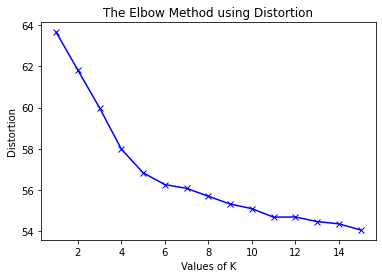

In [13]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

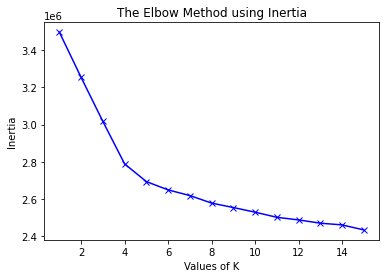

In [14]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Création d'un model de classification en utilisant la Classification Hiérarchique

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

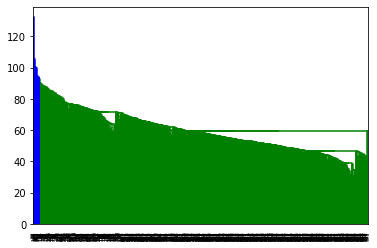

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram

z=linkage(data)
dendrogram(z)

In [16]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=4)
model.fit(data)

AgglomerativeClustering(n_clusters=4)

In [17]:
NCLUSTERS = 10

PATH = '/content/train.txt'
filename = 'ModelHierarchique.sav'

with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')
dataX = []
limit = 0
trainY=[]
for path in pathImages:
    temp = path.rfind('/')
    tag = path[path[:temp].rfind('/')+1:temp]
    trainY.append(tag)
trainY

['254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.greyhound',
 '254.grey

In [18]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=20)
model.fit(data)
pickle.dump(model, open(filename, 'wb'))
labels = model.labels_
print(type(model.labels_))

<class 'numpy.ndarray'>


In [19]:
result ={}

for i,val in enumerate(labels):
    if val not in result.keys():
        result[val]=[trainY[i]]
    else:
        continue
        #result[val].append(trainY[i])
for key in result.keys():
    tmp = result[key]
    result[key] = max(set(tmp),key=tmp.count)
print(result)
with open('label2folder1' + '.pkl', 'wb') as f:
        pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

{2: '254.greyhound', 13: '254.greyhound', 9: '254.greyhound', 19: '254.greyhound', 17: '254.greyhound', 8: '254.greyhound', 14: '254.greyhound', 12: '254.greyhound', 3: '255.tennis-shoes', 6: '255.tennis-shoes', 5: '255.tennis-shoes', 1: '255.tennis-shoes', 0: '255.tennis-shoes', 7: '256.toad', 11: '256.toad', 4: '256.toad', 16: '256.toad', 10: '257.clutter', 15: '257.clutter', 18: '257.clutter'}


In [20]:
PATH = '/content/test.txt'
filename = 'ModelHierarchique.sav'
SAVEFOLDER = '/content/caracteristiques'

TargetTestY =[]

model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#prepare data:
with open(PATH,'r') as f:
    pathImages = f.read().strip('\n').split('\n')

for path in pathImages:
    temp = path.rfind('/')
    dirname = path[path[:temp].rfind('/')+1:temp]
    dirfolder = '{}/{}'.format(SAVEFOLDER,dirname)

    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    np.save('{}/{}'.format(dirfolder,path[temp+1:path.rfind('.')]),features)

In [21]:
testX = []
for path in pathImages:
    temp = path.rfind('/')
    pathFeature = '{}/{}.npy'.format(SAVEFOLDER,path[path[0:temp].rfind('/')+1:path.rfind('.')])
    try:
        # print(pathFeature)
        testX.append(np.load(pathFeature)[0])
    except:
        continue
    nameFolder = path[path[:temp].rfind('/')+1: temp]
    TargetTestY.append(nameFolder)
print(TargetTestY)

['254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '254.greyhound', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.tennis-shoes', '255.t

In [26]:
with open('label2folder1' + '.pkl', 'rb') as f:
        tag = pickle.load(f)
with open(filename, 'rb') as file:  
    model = pickle.load(file)
print(testX)
testX = np.array(testX).astype(np.float32)
trainY = list(clf.predict(np.array(testX)))
for index, val in enumerate(trainY):
    trainY[index] = tag[val]
print('Accuracy: {}'.format(accuracy_score(TargetTestY,trainY)))

[[3.3659172  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.6268265  1.4484674 ]
 ...
 [0.         0.         2.3835227  ... 0.67282045 0.         0.        ]
 [0.         3.3249817  1.5144132  ... 0.         0.5089557  2.1134138 ]
 [0.         0.33160728 0.         ... 0.         0.66490215 0.1807616 ]]
Accuracy: 0.10818713450292397
